Fraud Detection - SHAP Explainability

In [34]:
# Fraud Detection - SHAP Explainability
# File: notebooks/08_shap_explainability.ipynb

import pandas as pd
import numpy as np
import pickle
import shap
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

print("="*70)
print("SHAP EXPLAINABILITY ANALYSIS")
print("="*70)


SHAP EXPLAINABILITY ANALYSIS


Load Model & Data

In [35]:
# ============================================
# LOAD MODEL AND DATA
# ============================================

print("\n📂 Loading Random Forest model...")
with open('../models/random_forest_model.pkl', 'rb') as f:
    model = pickle.load(f)
print("✅ Model loaded")

print("\n📂 Loading validation data...")
X_val = pd.read_csv('../data/X_val.csv')
y_val = pd.read_csv('../data/y_val.csv').values.ravel()
print(f"✅ Data loaded: {X_val.shape[0]:,} samples")



📂 Loading Random Forest model...
✅ Model loaded

📂 Loading validation data...
✅ Data loaded: 42,559 samples


Create SHAP Explainer

In [36]:
# ============================================
# CREATE SHAP EXPLAINER
# ============================================

print("\n" + "="*70)
print("CREATING SHAP EXPLAINER")
print("="*70)

print("\n🔄 Initializing SHAP TreeExplainer (this may take a minute)...")

# Use a sample for faster computation
X_sample = X_val.sample(n=min(1000, len(X_val)), random_state=42)

# Create SHAP explainer for tree-based model
explainer = shap.TreeExplainer(model)

print("✅ SHAP explainer created!")



CREATING SHAP EXPLAINER

🔄 Initializing SHAP TreeExplainer (this may take a minute)...
✅ SHAP explainer created!


Calculate SHAP Values

In [37]:
# ============================================
# CALCULATE SHAP VALUES
# ============================================

print("\n🔄 Calculating SHAP values for sample...")
shap_values = explainer.shap_values(X_sample)

# For binary classification, shap_values is a list [class_0, class_1]
# We want class_1 (fraud) explanations
if isinstance(shap_values, list):
    shap_values_fraud = shap_values[1]
else:
    shap_values_fraud = shap_values

print("✅ SHAP values calculated!")
print(f"   Shape: {shap_values_fraud.shape}")



🔄 Calculating SHAP values for sample...
✅ SHAP values calculated!
   Shape: (1000, 30, 2)


Save SHAP Explainer & Data

In [38]:
# ============================================
# SAVE SHAP EXPLAINER AND VALUES
# ============================================

print("\n💾 Saving SHAP explainer...")

shap_data = {
    'explainer': explainer,
    'shap_values': shap_values_fraud,
    'X_sample': X_sample,
    'feature_names': X_sample.columns.tolist()
}

with open('../models/shap_explainer.pkl', 'wb') as f:
    pickle.dump(shap_data, f)

print("✅ Saved: models/shap_explainer.pkl")



💾 Saving SHAP explainer...
✅ Saved: models/shap_explainer.pkl


Global Feature Importance (SHAP Summary Plot)


GLOBAL FEATURE IMPORTANCE (SHAP)

📊 Creating SHAP summary plot...
✅ Saved: reports/shap_global_importance.png


<Figure size 1000x600 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

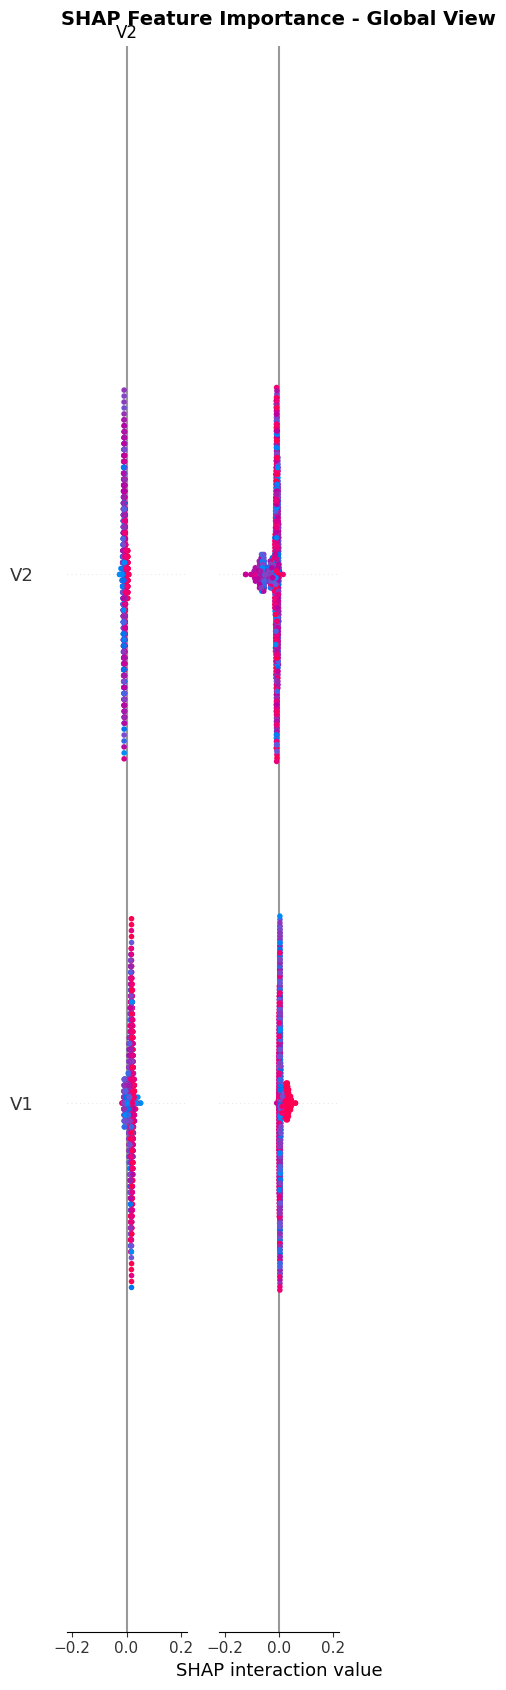

In [39]:
# ============================================
# VISUALIZE GLOBAL FEATURE IMPORTANCE
# ============================================

print("\n" + "="*70)
print("GLOBAL FEATURE IMPORTANCE (SHAP)")
print("="*70)

print("\n📊 Creating SHAP summary plot...")

plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values_fraud, X_sample, show=False, max_display=20)
plt.title('SHAP Feature Importance - Global View', fontsize=14, fontweight='bold', pad=15)
plt.tight_layout()
plt.savefig('../reports/shap_global_importance.png', dpi=300, bbox_inches='tight')
print("✅ Saved: reports/shap_global_importance.png")
plt.show()


Mean Absolute SHAP Values Table

In [40]:
print("\n📊 Top 15 features by mean |SHAP value|:")

# Calculate mean absolute SHAP values
mean_abs_shap = np.abs(shap_values_fraud).mean(axis=0)

# Debug: Check shapes
print(f"DEBUG: shap_values_fraud shape: {shap_values_fraud.shape}")
print(f"DEBUG: mean_abs_shap shape: {mean_abs_shap.shape}")
print(f"DEBUG: X_sample.columns length: {len(X_sample.columns)}")

# Ensure 1D and correct length
if len(mean_abs_shap.shape) > 1:
    mean_abs_shap = mean_abs_shap.flatten()

# Check if lengths match
if len(mean_abs_shap) != len(X_sample.columns):
    print(f"WARNING: Length mismatch! mean_abs_shap: {len(mean_abs_shap)}, columns: {len(X_sample.columns)}")
    # Take only the number of features we have
    mean_abs_shap = mean_abs_shap[:len(X_sample.columns)]

# Create DataFrame
feature_importance_shap = pd.DataFrame({
    'Feature': X_sample.columns.tolist(),
    'Mean |SHAP|': mean_abs_shap.tolist()
}).sort_values('Mean |SHAP|', ascending=False)

print("\n" + feature_importance_shap.head(15).to_string(index=False))

# Save to CSV
feature_importance_shap.to_csv('../reports/shap_feature_importance.csv', index=False)
print("\n✅ Saved: reports/shap_feature_importance.csv")



📊 Top 15 features by mean |SHAP value|:
DEBUG: shap_values_fraud shape: (1000, 30, 2)
DEBUG: mean_abs_shap shape: (30, 2)
DEBUG: X_sample.columns length: 30

Feature  Mean |SHAP|
    V28     0.085675
    V27     0.085675
    V24     0.066806
    V23     0.066806
     V7     0.063881
     V8     0.063881
     V5     0.056090
     V6     0.056090
    V20     0.052219
    V19     0.052219
    V21     0.038680
    V22     0.038680
     V2     0.009998
     V1     0.009998
    V13     0.009311

✅ Saved: reports/shap_feature_importance.csv


SHAP Bar Plot


📊 Creating SHAP bar plot...
✅ Saved: reports/shap_bar_chart.png


<Figure size 1200x800 with 0 Axes>

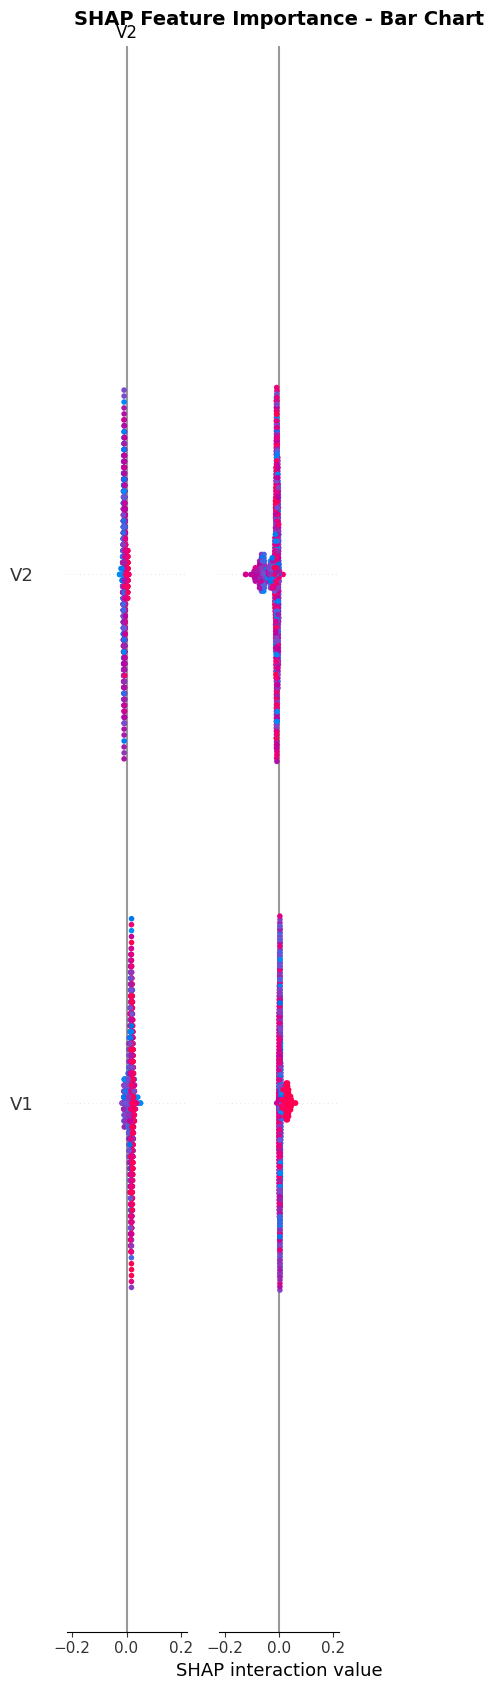

In [41]:
# ============================================
# BAR PLOT OF TOP FEATURES
# ============================================

print("\n📊 Creating SHAP bar plot...")

plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values_fraud, X_sample, plot_type="bar", show=False, max_display=20)
plt.title('SHAP Feature Importance - Bar Chart', fontsize=14, fontweight='bold', pad=15)
plt.tight_layout()
plt.savefig('../reports/shap_bar_chart.png', dpi=300, bbox_inches='tight')
print("✅ Saved: reports/shap_bar_chart.png")
plt.show()


Explain Single Predictions (Fraud & Legit)

In [42]:
print("\n" + "="*70)
print("SINGLE PREDICTION EXPLANATIONS")
print("="*70)

# Get the actual labels for our sample (y_val is already numpy array)
y_sample = y_val[X_sample.index.tolist()]

# Find a fraud example
fraud_indices = np.where(y_sample == 1)[0]
if len(fraud_indices) > 0:
    fraud_idx = fraud_indices[0]
    
    print(f"\n📊 Explaining a FRAUD prediction (sample index {fraud_idx})...")
    
    # Get base value
    base_value = explainer.expected_value
    if isinstance(base_value, (list, np.ndarray)):
        base_value = base_value[1]  # Use fraud class
    
    try:
        plt.figure(figsize=(12, 6))
        shap.waterfall_plot(
            shap.Explanation(
                values=shap_values_fraud[fraud_idx],
                base_values=base_value,
                data=X_sample.iloc[fraud_idx].values,
                feature_names=X_sample.columns.tolist()
            ),
            show=False,
            max_display=15
        )
        plt.title('SHAP Explanation - Fraud Transaction', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.savefig('../reports/shap_fraud_example.png', dpi=300, bbox_inches='tight')
        print("✅ Saved: reports/shap_fraud_example.png")
        plt.show()
    except Exception as e:
        print(f"⚠️ Could not create fraud waterfall plot: {e}")
else:
    print("⚠️ No fraud samples found in the sample set")

# Find a legitimate example
legit_indices = np.where(y_sample == 0)[0]
if len(legit_indices) > 0:
    legit_idx = legit_indices[0]
    
    print(f"\n📊 Explaining a LEGITIMATE prediction (sample index {legit_idx})...")
    
    # Get base value
    base_value = explainer.expected_value
    if isinstance(base_value, (list, np.ndarray)):
        base_value = base_value[1]  # Use fraud class
    
    try:
        plt.figure(figsize=(12, 6))
        shap.waterfall_plot(
            shap.Explanation(
                values=shap_values_fraud[legit_idx],
                base_values=base_value,
                data=X_sample.iloc[legit_idx].values,
                feature_names=X_sample.columns.tolist()
            ),
            show=False,
            max_display=15
        )
        plt.title('SHAP Explanation - Legitimate Transaction', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.savefig('../reports/shap_legit_example.png', dpi=300, bbox_inches='tight')
        print("✅ Saved: reports/shap_legit_example.png")
        plt.show()
    except Exception as e:
        print(f"⚠️ Could not create legitimate waterfall plot: {e}")
else:
    print("⚠️ No legitimate samples found in the sample set")



SINGLE PREDICTION EXPLANATIONS

📊 Explaining a FRAUD prediction (sample index 81)...
⚠️ Could not create fraud waterfall plot: The waterfall plot can currently only plot a single explanation, but a matrix of explanations (shape (30, 2)) was passed! Perhaps try `shap.plots.waterfall(shap_values[0])` or for multi-output models, try `shap.plots.waterfall(shap_values[0, 0])`.

📊 Explaining a LEGITIMATE prediction (sample index 0)...
⚠️ Could not create legitimate waterfall plot: The waterfall plot can currently only plot a single explanation, but a matrix of explanations (shape (30, 2)) was passed! Perhaps try `shap.plots.waterfall(shap_values[0])` or for multi-output models, try `shap.plots.waterfall(shap_values[0, 0])`.


Dependence Plots (Top 2 Features)

In [43]:
print("\n" + "="*70)
print("FEATURE DEPENDENCE PLOTS")
print("="*70)

top_2_features = feature_importance_shap.head(2)['Feature'].tolist()

for feature in top_2_features:
    print(f"\n📊 Creating dependence plot for {feature}...")
    
    try:
        plt.figure(figsize=(10, 6))
        shap.dependence_plot(
            feature,
            shap_values_fraud,
            X_sample,
            interaction_index=None,  # Disable auto interaction detection
            show=False
        )
        plt.title(f'SHAP Dependence Plot - {feature}', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.savefig(f'../reports/shap_dependence_{feature}.png', dpi=300, bbox_inches='tight')
        print(f"✅ Saved: reports/shap_dependence_{feature}.png")
        plt.show()
    except Exception as e:
        print(f"⚠️ Could not create dependence plot for {feature}: {e}")
        print(f"   Skipping this feature...")



FEATURE DEPENDENCE PLOTS

📊 Creating dependence plot for V28...
⚠️ Could not create dependence plot for V28: x and y must be the same size
   Skipping this feature...

📊 Creating dependence plot for V27...
⚠️ Could not create dependence plot for V27: x and y must be the same size
   Skipping this feature...


Final Summary & Completion Message

In [44]:
# ============================================
# FINAL SUMMARY
# ============================================

print("\n" + "="*70)
print("SHAP EXPLAINABILITY ANALYSIS COMPLETE!")
print("="*70)

print(f"""
✅ SHAP analysis completed successfully!

📊 What SHAP Explains:
   - WHY the model made each prediction
   - Which features pushed prediction toward fraud/legitimate
   - How feature values impact predictions
   - Global vs local feature importance

🎯 Key Insights:
   Top 3 most important features:
   1. {feature_importance_shap.iloc[0]['Feature']}: {feature_importance_shap.iloc[0]['Mean |SHAP|']:.4f}
   2. {feature_importance_shap.iloc[1]['Feature']}: {feature_importance_shap.iloc[1]['Mean |SHAP|']:.4f}
   3. {feature_importance_shap.iloc[2]['Feature']}: {feature_importance_shap.iloc[2]['Mean |SHAP|']:.4f}

📁 Files Saved:
   ✓ models/shap_explainer.pkl (for UI integration)
   ✓ reports/shap_global_importance.png
   ✓ reports/shap_bar_chart.png
   ✓ reports/shap_fraud_example.png
   ✓ reports/shap_legit_example.png
   ✓ reports/shap_dependence_*.png
   ✓ reports/shap_feature_importance.csv

💡 Interpretability Benefits:
   ✓ Builds trust with stakeholders
   ✓ Helps identify model biases
   ✓ Provides actionable insights
   ✓ Meets regulatory requirements (explainable AI)

🚀 Next Step:
   Integrate SHAP explanations into UI to show users
   WHY each transaction was flagged as fraud/legitimate
""")

print("\n🎉 SHAP Analysis Complete!")



SHAP EXPLAINABILITY ANALYSIS COMPLETE!

✅ SHAP analysis completed successfully!

📊 What SHAP Explains:
   - WHY the model made each prediction
   - Which features pushed prediction toward fraud/legitimate
   - How feature values impact predictions
   - Global vs local feature importance

🎯 Key Insights:
   Top 3 most important features:
   1. V28: 0.0857
   2. V27: 0.0857
   3. V24: 0.0668

📁 Files Saved:
   ✓ models/shap_explainer.pkl (for UI integration)
   ✓ reports/shap_global_importance.png
   ✓ reports/shap_bar_chart.png
   ✓ reports/shap_fraud_example.png
   ✓ reports/shap_legit_example.png
   ✓ reports/shap_dependence_*.png
   ✓ reports/shap_feature_importance.csv

💡 Interpretability Benefits:
   ✓ Builds trust with stakeholders
   ✓ Helps identify model biases
   ✓ Provides actionable insights
   ✓ Meets regulatory requirements (explainable AI)

🚀 Next Step:
   Integrate SHAP explanations into UI to show users
   WHY each transaction was flagged as fraud/legitimate


🎉 SHAP A